In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
raw=pd.read_csv('data.csv')
print(raw.shape)
raw.head()

(30697, 25)


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [3]:
kobe=raw[pd.notnull(raw['shot_made_flag'])]
kobe.shape

(25697, 25)

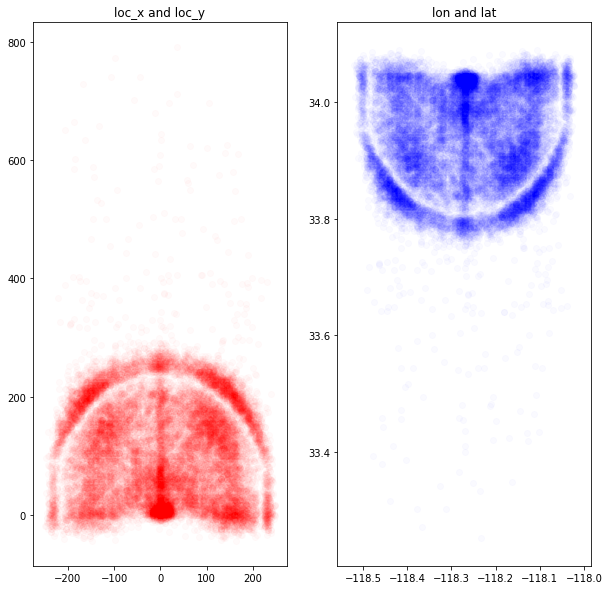

In [4]:
alpha=0.02   #值的透明度
fig=plt.figure(figsize=(10,10))
plot1=fig.add_subplot(1,2,1)
plot1.scatter(kobe.loc_x,kobe.loc_y,c='red',alpha=alpha)
plt.title('loc_x and loc_y')


plot2=fig.add_subplot(1,2,2)
plot2.scatter(kobe.lon,kobe.lat,c='blue',alpha=alpha)
plt.title('lon and lat')
plt.show()

In [5]:
raw['dist']=np.sqrt(raw['loc_x']**2+raw['loc_y']**2)
loc_x_zero=raw['loc_x']==0
# print(loc_x_zero)
raw['angle']=np.zeros(len(raw))
raw['angle'][~loc_x_zero]=np.arctan(raw['loc_y'][~loc_x_zero]/raw['loc_x'][~loc_x_zero])
# print(raw['angle'][~loc_x_zero])
raw['angle'][loc_x_zero]=np.pi/2


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [6]:
raw['remaining_time']=raw['minutes_remaining']*60+raw['seconds_remaining']

In [8]:
print(kobe.action_type.unique())
print(kobe.combined_shot_type.unique())
print(kobe.shot_type.unique())
print(kobe.shot_type.value_counts())

['Jump Shot' 'Driving Dunk Shot' 'Layup Shot' 'Running Jump Shot'
 'Reverse Dunk Shot' 'Slam Dunk Shot' 'Driving Layup Shot'
 'Turnaround Jump Shot' 'Reverse Layup Shot' 'Tip Shot'
 'Running Hook Shot' 'Alley Oop Dunk Shot' 'Dunk Shot'
 'Alley Oop Layup shot' 'Running Dunk Shot' 'Driving Finger Roll Shot'
 'Running Layup Shot' 'Finger Roll Shot' 'Fadeaway Jump Shot'
 'Follow Up Dunk Shot' 'Hook Shot' 'Turnaround Hook Shot' 'Jump Hook Shot'
 'Running Finger Roll Shot' 'Jump Bank Shot' 'Turnaround Finger Roll Shot'
 'Hook Bank Shot' 'Driving Hook Shot' 'Running Tip Shot'
 'Running Reverse Layup Shot' 'Driving Finger Roll Layup Shot'
 'Fadeaway Bank shot' 'Pullup Jump shot' 'Finger Roll Layup Shot'
 'Turnaround Fadeaway shot' 'Driving Reverse Layup Shot'
 'Driving Slam Dunk Shot' 'Step Back Jump shot' 'Turnaround Bank shot'
 'Reverse Slam Dunk Shot' 'Floating Jump shot' 'Putback Slam Dunk Shot'
 'Running Bank shot' 'Driving Bank shot' 'Driving Jump shot'
 'Putback Layup Shot' 'Putback Dun

In [9]:
kobe.season.unique()

array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '1996-97', '1997-98',
       '1998-99', '1999-00'], dtype=object)

In [12]:
raw['season']=raw.season.apply(lambda x:int(x.split('-')[-1]))
raw['season'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 97,
       98, 99,  0], dtype=int64)

In [13]:
print(kobe['team_id'].unique())
print(kobe['team_name'].unique())

[1610612747]
['Los Angeles Lakers']


In [14]:
pd.DataFrame({'matchup':kobe.matchup,'opponent':kobe.opponent})


,matchup,opponent
1,LAL @ POR,POR
2,LAL @ POR,POR
3,LAL @ POR,POR
4,LAL @ POR,POR
5,LAL @ POR,POR
6,LAL @ POR,POR
8,LAL @ POR,POR
9,LAL @ POR,POR
10,LAL @ POR,POR
11,LAL vs. UTA,UTA


Text(0.5,1,'dist and shot_distance')

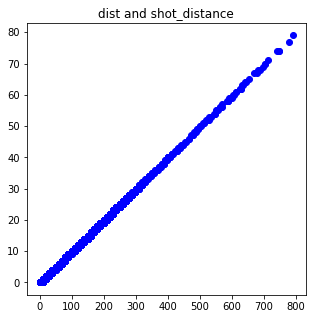

In [17]:
plt.figure(figsize=(5,5))
plt.scatter(raw.dist,raw.shot_distance,c='blue')
plt.title('dist and shot_distance')

In [19]:
gs=kobe.groupby('shot_zone_area')
print(kobe['shot_zone_area'].value_counts())
print(len(gs))
print(gs)

Center(C)                11289
Right Side Center(RC)     3981
Right Side(R)             3859
Left Side Center(LC)      3364
Left Side(L)              3132
Back Court(BC)              72
Name: shot_zone_area, dtype: int64
6


Text(0.5,1,'shot_zone_range')

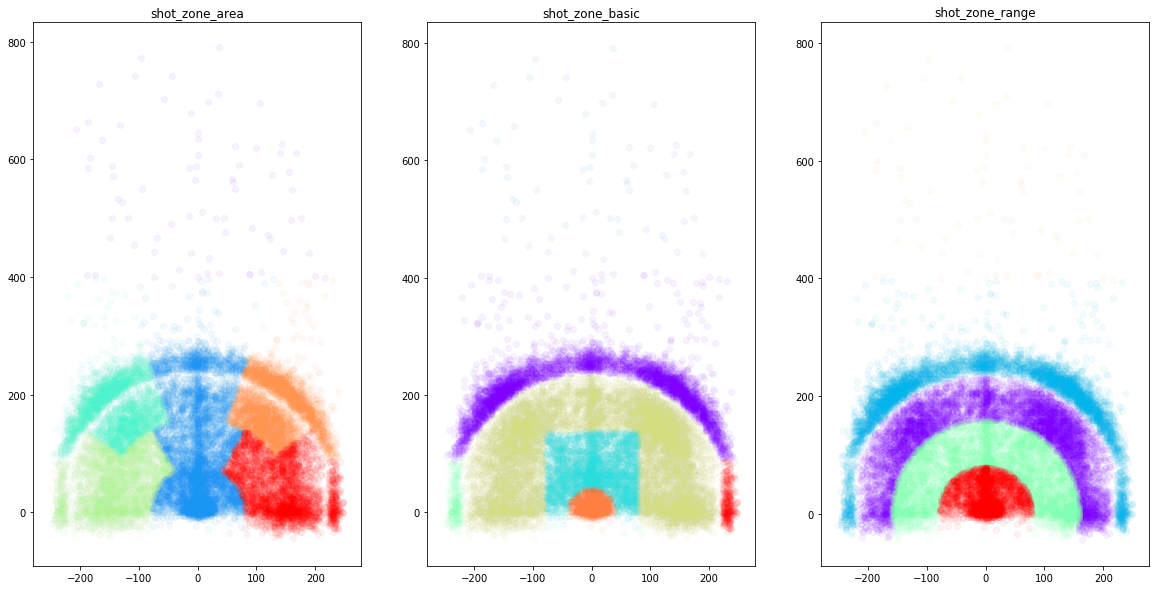

In [42]:
from matplotlib import cm
plt.figure(figsize=(20,10))
def scatter_plot_by_category(feat):
    alpha=0.05
    gs=kobe.groupby(feat)
    cs=cm.rainbow(np.linspace(0,1,len(gs)))
    for g,s in zip(gs,cs):
        plt.scatter(g[1].loc_x,g[1].loc_y,c=s,alpha=alpha)

plt.subplot(131)
scatter_plot_by_category('shot_zone_area')
plt.title('shot_zone_area')

plt.subplot(132)
scatter_plot_by_category('shot_zone_basic')
plt.title('shot_zone_basic')

plt.subplot(133)
scatter_plot_by_category('shot_zone_range')
plt.title('shot_zone_range')

In [43]:
drops = ['shot_id', 'team_id', 'team_name', 'shot_zone_area', 'shot_zone_range', 'shot_zone_basic', \
         'matchup', 'lon', 'lat', 'seconds_remaining', 'minutes_remaining', \
         'shot_distance', 'loc_x', 'loc_y', 'game_event_id', 'game_id', 'game_date']
for drop in drops:
    raw=raw.drop(drop,1)

In [45]:
print(raw['combined_shot_type'].value_counts())
pd.get_dummies(raw['combined_shot_type'],prefix='combined_shot_type')

Jump Shot    23485
Layup         5448
Dunk          1286
Tip Shot       184
Hook Shot      153
Bank Shot      141
Name: combined_shot_type, dtype: int64


,combined_shot_type_Bank Shot,combined_shot_type_Dunk,combined_shot_type_Hook Shot,combined_shot_type_Jump Shot,combined_shot_type_Layup,combined_shot_type_Tip Shot
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,1,0,0,0,0
5,0,0,0,1,0,0
6,0,0,0,0,1,0
7,0,0,0,1,0,0
8,0,0,0,1,0,0
9,0,0,0,1,0,0


In [46]:
categorical_vars = ['action_type', 'combined_shot_type', 'shot_type', 'opponent', 'period', 'season']
for var in categorical_vars:
    pd.concat([raw,pd.get_dummies(raw[var],prefix=var)],1)
    raw=raw.drop(var,1)

In [63]:
train_kobe=raw[pd.notnull(raw['shot_made_flag'])]
train_label=train_kobe['shot_made_flag']
train_kobe=train_kobe.drop('shot_made_flag',1)
test_kobe=raw[pd.isnull(raw['shot_made_flag'])]
test_kobe=test_kobe.drop('shot_made_flag',1)

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix,log_loss
import time 
import numpy as np
range_m=np.logspace(0,2,3).astype(int)
print(range_m)

[  1  10 100]


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold
min_score=10000
best_n=0
scores_n=[]
range_n=np.logspace(0,2,3).astype(int)
for n in range_n:
    print('the number of trees:{0}'.format(n))
    t1=time.time()
    rfc_score = 0
    rfc=RandomForestClassifier(n_estimators=n)
    for train_k,test_k in KFold(len(train_kobe),n_folds=10,shuffle=True):
        rfc.fit(train_kobe.iloc[train_k],train_label.iloc[train_k])
        pred=rfc.predict(train_kobe.iloc[test_k])
        rfc_score+=log_loss(train_label.iloc[test_k],pred)/10
    scores_n.append(rfc_score)
    if rfc_score<min_score:
        min_score=rfc_score
        best_n=n
    t2=time.time()
    print('Done processing {0} trees ({1}sec)'.format(n, t2-t1))
print(best_n, min_score)


print('Finding best max_depth for RandomForestClassifier...')
min_score = 100000
best_m = 0
scores_m = []
range_m = np.logspace(0,2,num=3).astype(int)
for m in range_m:
    print("the max depth : {0}".format(m))
    t1 = time.time()
    
    rfc_score = 0.
    rfc = RandomForestClassifier(max_depth=m, n_estimators=best_n)
    for train_k, test_k in KFold(len(train_kobe), n_folds=10, shuffle=True):
        rfc.fit(train_kobe.iloc[train_k], train_label.iloc[train_k])
        #rfc_score += rfc.score(train.iloc[test_k], train_y.iloc[test_k])/10
        pred = rfc.predict(train_kobe.iloc[test_k])
        rfc_score += log_loss(train_label.iloc[test_k], pred) / 10
    scores_m.append(rfc_score)
    if rfc_score < min_score:
        min_score = rfc_score
        best_m = m
    
    t2 = time.time()
    print('Done processing {0} trees ({1:.3f}sec)'.format(m, t2-t1))
print(best_m, min_score)

the number of trees:1
Done processing 1 trees (1.1076018810272217sec)
the number of trees:10
Done processing 10 trees (8.611215114593506sec)
the number of trees:100
Done processing 100 trees (85.06694960594177sec)
100 15.087437494946771
Finding best max_depth for RandomForestClassifier...
the max depth : 1
Done processing 1 trees (8.393sec)
the max depth : 10
Done processing 10 trees (40.576sec)
the max depth : 100
Done processing 100 trees (86.705sec)
1 13.499986891586483


Text(0.5,0,'the max depth')

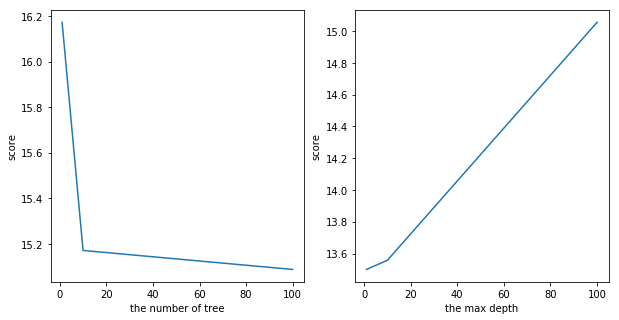

In [66]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(range_n,scores_n)
plt.ylabel('score')
plt.xlabel('the number of tree')

plt.subplot(122)
plt.plot(range_m,scores_m)
plt.ylabel('score')
plt.xlabel('the max depth')


In [67]:
model = RandomForestClassifier(n_estimators=best_n, max_depth=best_m)
model.fit(train_kobe, train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)